# Principal Component Analysis
## Introduction

Principal Component Analysis (PCA) is a dimensionality-reduction method that is typically used to transform a high-dimensional data set into a smaller-dimensional subspace prior to applying a machine learning algorithm on the data.


Let $\mathbf{x^i} = \left[ x_1^i, x_2^i, \cdots, x_M^i \right]$ be a M-dimensional vector describing the $i$-th sample. The entire dataset of $N$ samples can be expressed as a $N \times M$ matrix $X$, whose rows are the samples:

\begin{align}
X &= \left(
\begin{array}{cccc}
x_1^1 & x_2^1  & \ldots & x_M^1  \\
x_1^2 & x_2^2  & \ldots & x_M^2  \\
\vdots & \vdots & \ddots & \vdots \\
x_1^N & x_2^N  & \ldots & x_M^N
\end{array} \right) 
\end{align}

PCA aims to transform the original data in order to maximise its variance. In practice, the new representation of the data $Y$ is linearly related to the original one:

\begin{equation} 
Y = X \cdot V
\end{equation}

The columns of $V$, $\{ \mathbf{v}_1, \cdots , \mathbf{v}_M \}$ are the principal components (PCs) of $X$, and correspond to the eigenvectors of the covariance matrix of $X$, which is defined as:

\begin{equation}
\text{cov} (X)= \frac{1}{N} \sum_n^{N} (x_n - \mu_x) \, (x_n - \mu_x)
\end{equation}

The covariance matrix, $\text{cov} (X)$, describes all relationships between pairs of measurements in our dataset $X$.

Because the covariance matrix is symmetric, the eigenvectors form an orthogonal set. The PCs (eigenvectors) correspond to the direction (in the original n-dimensional space) with the greatest variance in the data. Each eigenvector has a corresponding eigenvalue, indicating how much variance there is in the data along the corresponding eigenvector (or PC).

The dimensionality reduction can be performed by removing the PCs with the lowest eigenvalues, thus throwing away redundant features with low information content.


## Demo 1: creating PCA function

In order to get better insight into PCA, we will create a Python script for PCA from scratch and then apply it on a simple toy data.

<b>NOTE</b>: it is important to run all the steps (code cells) below to ensure correct execution.

First, the following codes is necessary to import the useful part of Python tools and libraries:

In [3]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt # This imports matplotlib library for plotting

First we define the PCA function:

In [2]:
def PCA(X):
    
    # computes the covariance of X
    # numpy covariance function assumes different ordering, so we transpose X
    XCov = np.cov(X.T)
    
    # solves the eigenproblem and stores eigvals in D and eigvecs in V
    D, V = np.linalg.eig(XCov)
    
    # perform the linear transformation - matrix-matrix multiplication
    Yn = np.dot(X,V)

    # return the eigenvector matrix V, the transformed data Yn, and the eigenvalues D
    return V,Yn,D

## Tutorial 1: PCA for dimensionality reduction on wine chemical data

In this tutorial we will use real experimental data, representing the chemical composition of about 178 wine samples, from three different cultivars in the same region in Italy.
For each wine, the analysis determined the quantities of 13 constituents, listed below:

<table>
  <tr>
    <th>Feature No.</th>
    <th>Wine Chemical Composition</th> 
  </tr>
  <tr>
    <td>1</td>
    <td>Alcohol</td>
  </tr>
  <tr>
    <td>2</td>
    <td>Malic acid</td>
  </tr>
  <tr>
    <td>3</td>
    <td>Ash</td>
  </tr>
  <tr>
    <td>4</td>
    <td>Alcalinity of ash</td>
  </tr>
  <tr>
    <td>5</td>
    <td>Magnesium</td>
  </tr>
  <tr>
    <td>6</td>
    <td>Total phenols</td>
  </tr>
  <tr>
    <td>7</td>
    <td>Flavanoids</td>
  </tr>
  <tr>
    <td>8</td>
    <td>Nonavanoid phenols</td>
  </tr>
  <tr>
    <td>9</td>
    <td>Proanthocyanins</td>
  </tr>
  <tr>
    <td>10</td>
    <td>Color intensity</td>
  </tr>
  <tr>
    <td>11</td>
    <td>Hue</td>
  </tr>
  <tr>
    <td>12</td>
    <td>OD280/OD315 of diluted wines</td>
  </tr>
  <tr>
    <td>13</td>
    <td>Proline</td>
  </tr>
  <caption>Wine chemical composition*
  
  *Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science</caption>
</table><br>

The data file <i>./data/wineInputs.txt</i> contains 178 lines, each with the 13 entries representing the wine chemical composition (descriptor). The file  <i>./data/wineOutputs.txt</i> contains the type of each wine: either 1, 2 or 3.

In this tutorial, the objective is to reduce the dimensionality of the descriptors by identifying and eliminating the redundant ones with PCA. 

In [4]:
# We define normalization function here, that is zscore function
# It is also known as standard score
def zscore(X): # z-score uses to normalise the data.
    
    # get the shape of the data matrix
    [nX,mX] = X.shape
    
    # compute the mean of every column X
    XMean = np.mean(X, axis=0)
    
    # compute standard deviation of each column
    XStd = np.std(X,axis=0,ddof=1)
    
    # subtract the mean from each column
    zX = X - np.kron(np.ones((nX,1)),XMean) # Z = [X - mX]
    
    # divide by the stdv
    Zscore = np.divide(zX,XStd)
    
    return Zscore

First, we load input/output data from the files

In [5]:
dataIn = np.genfromtxt('../data/wineInputs.txt', delimiter=',')
dataOut = np.genfromtxt('../data/wineOutputs.txt', delimiter=',')

Apply zscore normalization to create 'X' matrix

In [6]:
X = zscore(dataIn) 


Then Apply the  PCA to create V, Ypca and D matrices

In [7]:
[V, Ypca ,D] = PCA(X)



Here, we try to obtain the normalized cumulative sum (cumsum) of eigenvalues
assuming D are the eigenvalues from PCA. Can you think how to this?

In [8]:
idc = np.divide(np.cumsum(D),np.sum(D)) 
print idc

[0.3619885  0.55406352 0.6652994  0.73598966 0.80162249 0.85098079
 0.8933678  0.92017533 0.92812746 0.94110991 0.96333145 0.98069988
 1.        ]


We plot normalized cumulative sum to understand the contributions of the obtained PCs

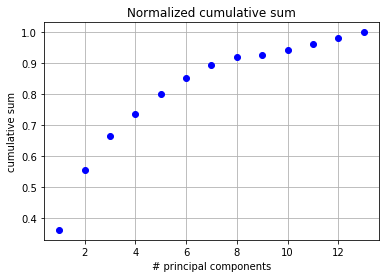

In [9]:
plt.title('Normalized cumulative sum')
plt.xlabel('# principal components')
plt.ylabel('cumulative sum')

#plt.plot(xrange(1,len(D)+1),idc,'bo') # re-plot the data
plt.plot(range(1,len(D)+1),idc,'bo') # re-plot the data

plt.grid()
plt.show()

## Demo 2: Clustering on a simple toy data
In this subsection, we implement K-means to cluster a simple toy data. 
First, we import all necessary libraries.

In [10]:
# We import all necessary libraries
from pyKmeans import Kmeans # This imports the Kmeans function (which we created)
import numpy as np # This imports numerical python (numpy) library
import matplotlib.pyplot as plt # This imports matplotlib library for plotting


Then, we create a simple data based on two independent multivariate Gaussian distributions and we plot this data.

In [ ]:
# We create synthetic data using two Gaussian distributions
# First, we determine the mean and standard deviation of two Gaussian distributions
mu1=np.array([5,2]); sigma1=np.array([[0.4,-0.0255],[-0.0255,0.2]])
mu2=np.array([9,7]); sigma2=np.array([[0.10,0],[0,0.4]])

# Second, we determine the number of data points on each Gaussian distribution
N1=300; N2=100

# Third, we add these properties into multivariate normal dist. function in numpy
X1=np.random.multivariate_normal(mu1, sigma1, N1)
X2=np.random.multivariate_normal(mu2, sigma2, N2)
X = np.concatenate((X1, X2), axis=0) # combine X1 and X2 as data X

# Fourth, we plot the synthetic data based on two Gaussian distribution function 
plt.plot(X[:,0],X[:,1],'bo',linewidth=2.0,markersize=4.0)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

The result in the Figure shows very well separated data.
Of course, it is very easy to visualize the separation/group by human eye, but clustering aims to do this process automatically. K-means clustering is one of simple algorithm to cluster/group data sets.

In this tutorial, the number of clusters K is assumed to be known. There are some automatic
methods in determining K parameter, but they are not discussed here.

We then apply <i>K-means</i> function on the data (if you are interested the detailed of the algorithm, you can take a look at <i>Kmeans.py</i>). The function returns the cluster indices as well as the cluster's
centroids. Finally, we plot the data for each cluster using different colour.

The produced Figure demonstrates how K-means algorithm successfully forms two clusters in the data.
The above problem of course is very easy to visualize because the generated data set is very well separated. The next exercise will demonstrate more challenging problem. The exercise is a good example to understand how K-means can be useful in practice.

We import all necessary libraries

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import pylab

We assume that we know the number of cluster, set variable 'K' to 3 clusters

In [12]:
K = 3 


apply K-means clustering on the first three PCs data (hint: PCs are stored in the Ypca matrix as columns)

In [13]:
assignment1, mu_k = Kmeans(Ypca[:,0:3],K)


mu_k (centroid) values: 
 [[ 0.23039158  1.81622364 -0.24292159]
 [-2.23418669 -0.7339778   0.03195318]
 [ 2.71238416 -1.1224844   0.2384227 ]]


plot the output and real classes here


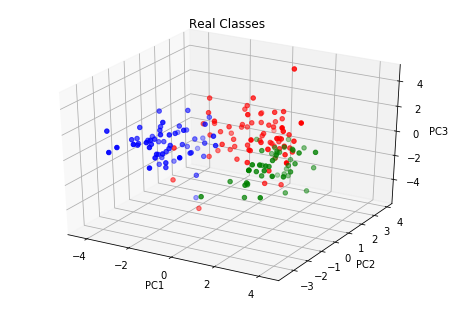

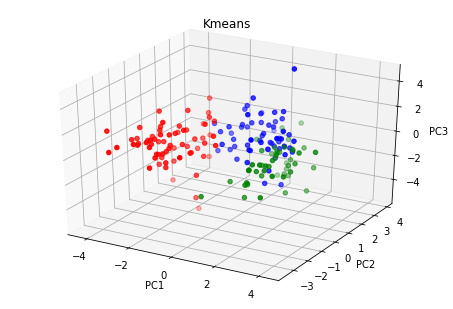

In [14]:
fig1 = pylab.figure()
ax = Axes3D(fig1)
ax.scatter(Ypca[dataOut==1,0],Ypca[dataOut==1,1],Ypca[dataOut==1,2],c='b')
ax.scatter(Ypca[dataOut==2,0],Ypca[dataOut==2,1],Ypca[dataOut==2,2],c='r')
ax.scatter(Ypca[dataOut==3,0],Ypca[dataOut==3,1],Ypca[dataOut==3,2],c='g')
plt.title('Real Classes')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Plot the wine classes based on K-means clustering here
fig2 = pylab.figure()
ax = Axes3D(fig2)
ax.scatter(Ypca[assignment1==1,0],Ypca[assignment1==1,1],Ypca[assignment1==1,2],c='b')
ax.scatter(Ypca[assignment1==2,0],Ypca[assignment1==2,1],Ypca[assignment1==2,2],c='r')
ax.scatter(Ypca[assignment1==3,0],Ypca[assignment1==3,1],Ypca[assignment1==3,2],c='g')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('Kmeans')

plt.show()


Using numpy to load file of relative humidity and solar radiation:

In [ ]:
Data = np.loadtxt('../data/DataForClusteringFinal.txt', skiprows=1)

 Relative Humidty (RH) and Global radiation to NPF

We will use a matrix 'X' to represent the data which we will use as a unsupervised learning. X is column 2 and 3 of the *Data* above which is RH and global radiation.

To check how our method performs, *Data* also contains our expected output which is known as *labels* in data mining speak. This is columns 4 (event day) and 5 (non-event day). Assign this expected output as 'Y'. 


Run the clustering on X. How does it compare to the real output Y? 


In [ ]:
#
X = np.stack((Data[:,1],Data[:,2]),axis=1)
y = np.stack((Data[:,3],Data[:,4]),axis=1)

# Remove any nan data
idxNotNaN = ~np.isnan(X).any(axis=1)
X = X[idxNotNaN,:]
y = y[idxNotNaN,:]

# Kmeans clustering algorithm
idx, mu_k = Kmeans(X,2) # calculate clusters and centroids


fig = plt.figure()
ax1 = fig.add_subplot(122)
plt.plot(X[idx==2,0],X[idx==2,1],'b.')
plt.plot(X[idx==1,0],X[idx==1,1],'r.')
plt.title('K-means clustering')
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.xlabel('Relative Humidty (%)')
plt.ylabel('Global Radiation (W/m^2)')

ax1 = fig.add_subplot(121)
# plot event:
idxE=np.where(y[:,0]==1)
plt.plot(X[idxE,0],X[idxE,1],'r.')
# plot non-event:
idxE=np.where(y[:,1]==1)
plt.plot(X[idxE,0],X[idxE,1],'b.')
plt.title('Real NPF cluster')
plt.xlim(0, 100)
plt.ylim(0, 500)
plt.xlabel('Relative Humidty (%)')
plt.ylabel('Global Radiation (W/m^2)')

plt.show()